In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [48]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = '../DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [49]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [50]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [51]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [52]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [53]:
# Duplicated
df.duplicated().sum()

14342

In [54]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

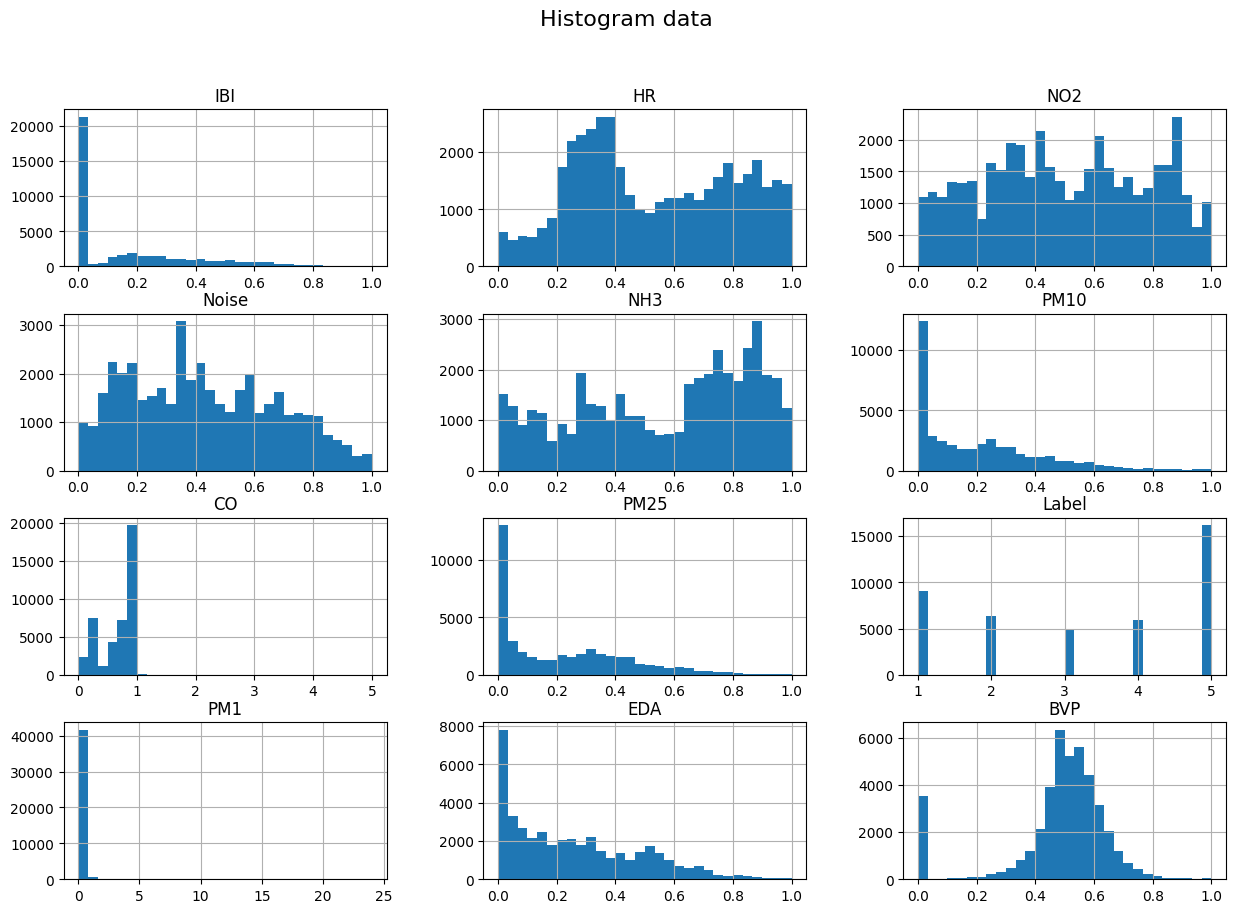

In [55]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [56]:
df.shape

(42436, 12)

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_1550/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


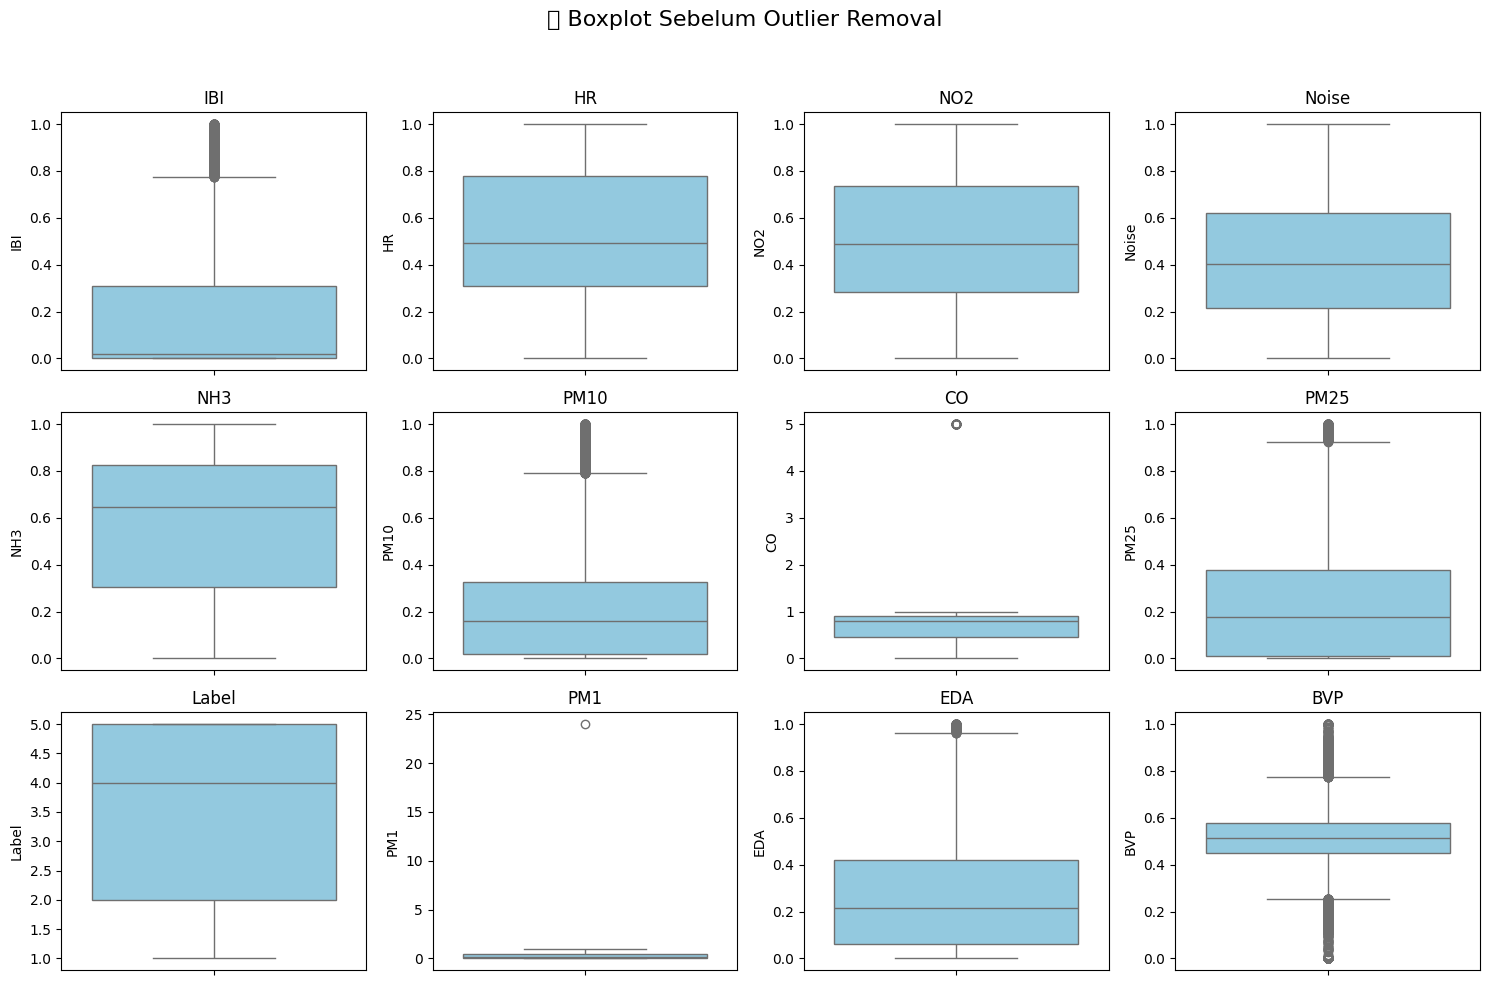

In [57]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [58]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [59]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_1550/230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


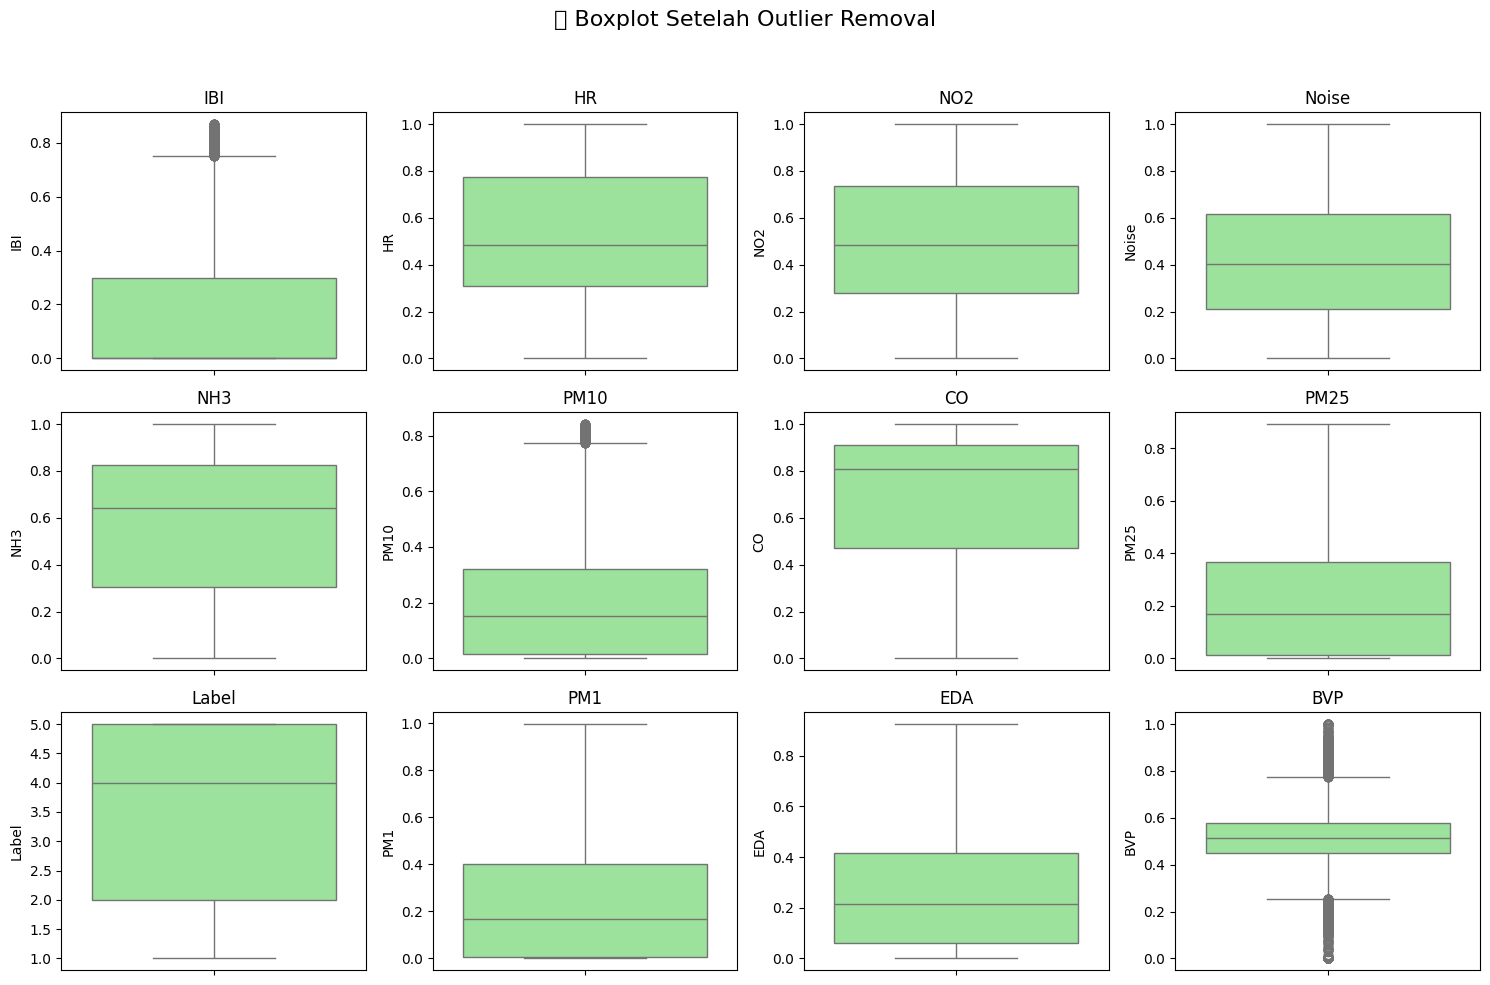

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


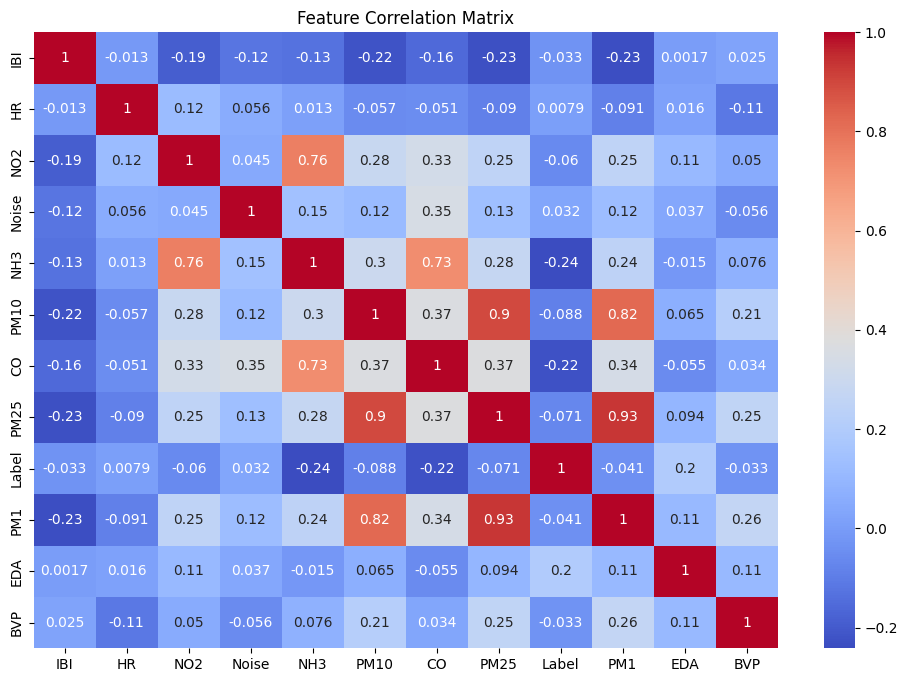

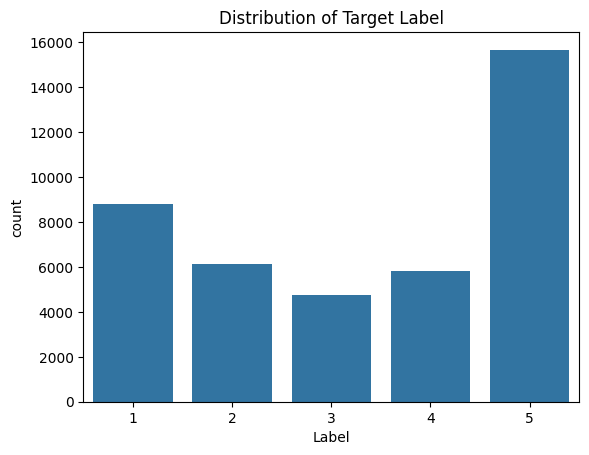

In [61]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [62]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [63]:
print(X.info())
print(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 0 to 42435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     41189 non-null  float64
 1   HR      41189 non-null  float64
 2   NO2     41189 non-null  float64
 3   Noise   41189 non-null  float64
 4   NH3     41189 non-null  float64
 5   PM10    41189 non-null  float64
 6   CO      41189 non-null  float64
 7   PM25    41189 non-null  float64
 8   PM1     41189 non-null  float64
 9   EDA     41189 non-null  float64
 10  BVP     41189 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB
None
Label
5    15671
1     8805
2     6137
4     5835
3     4741
Name: count, dtype: int64


## Prepocessing

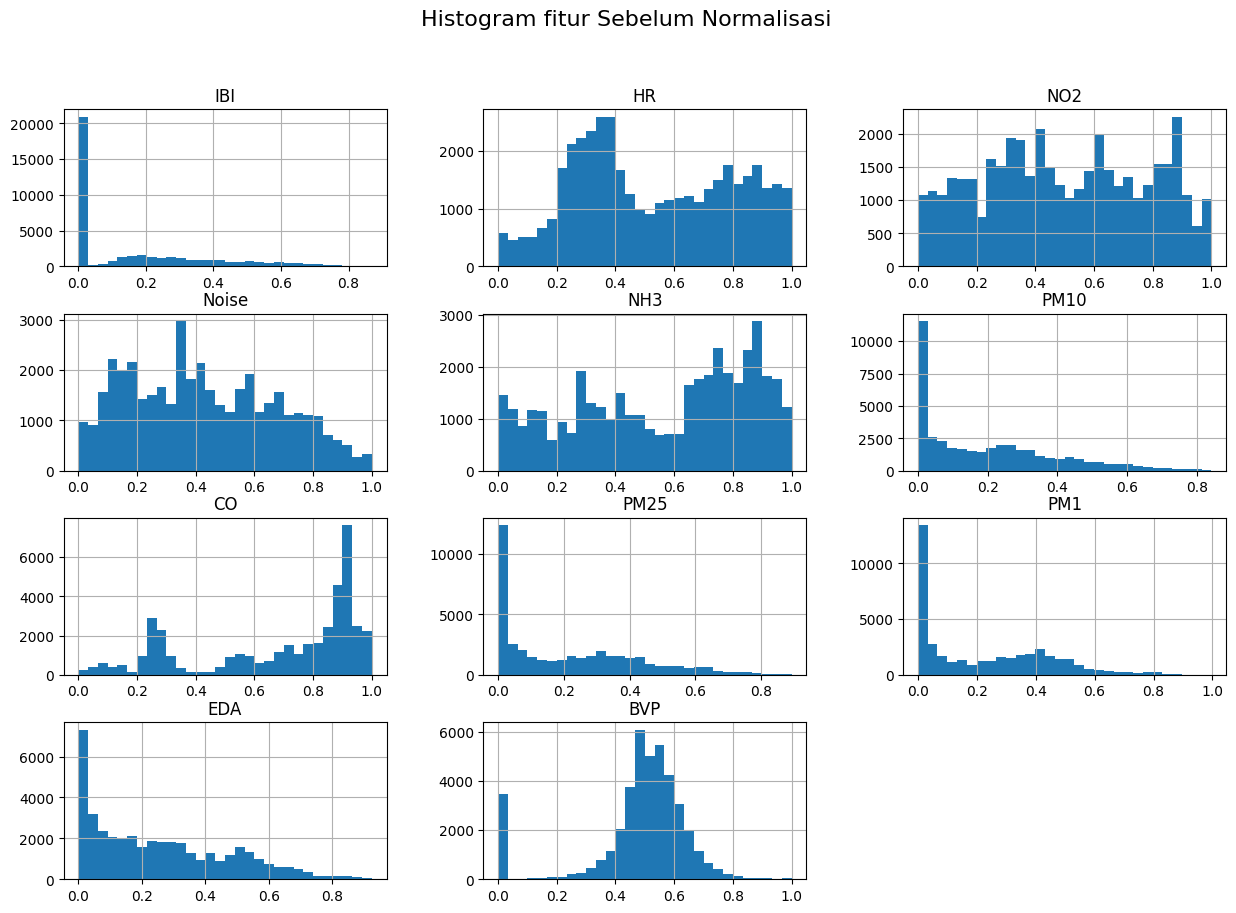

In [64]:
# Histogram sebelum normalisasi
X.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
# Split data menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (32951, 11)
Data Test after normalisation = (8238, 11)


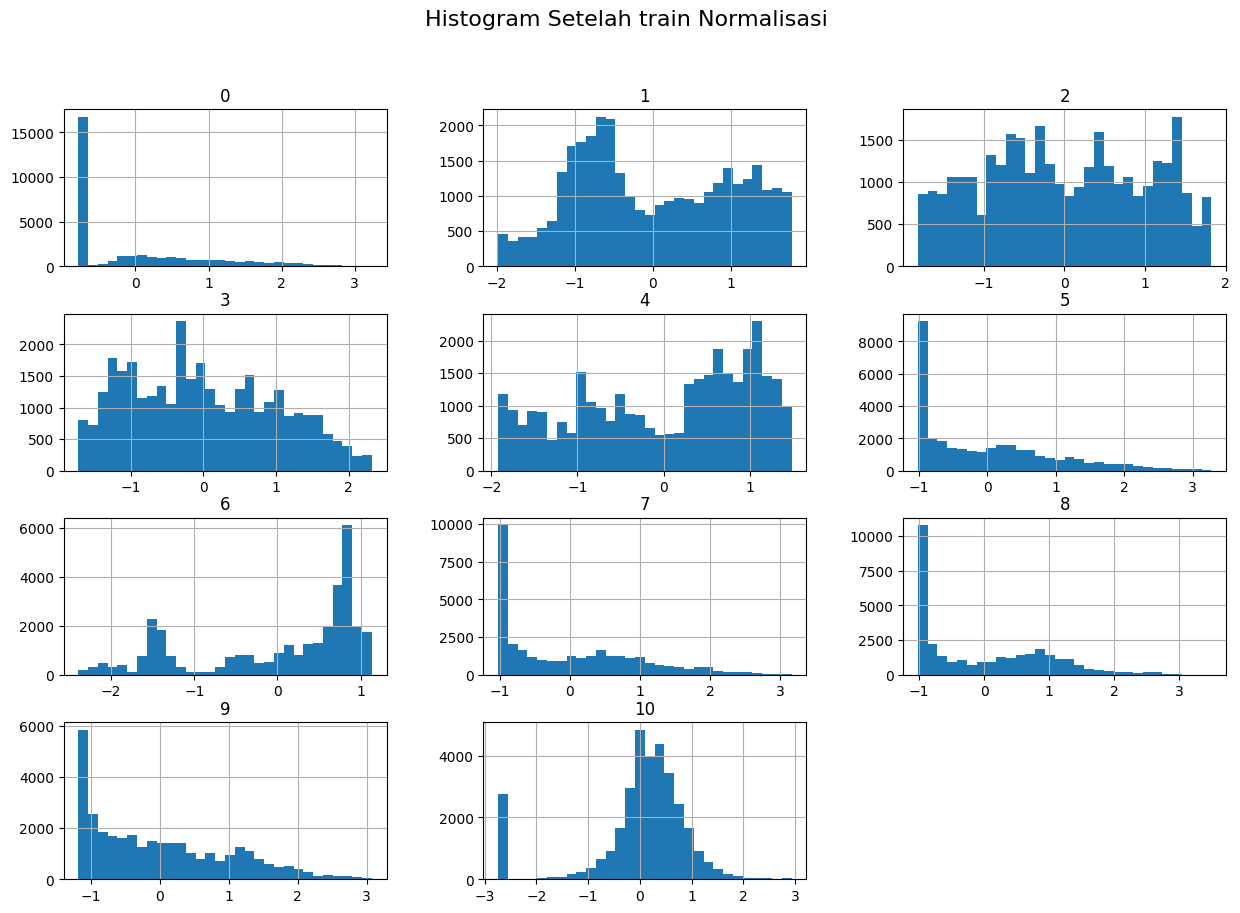

In [67]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

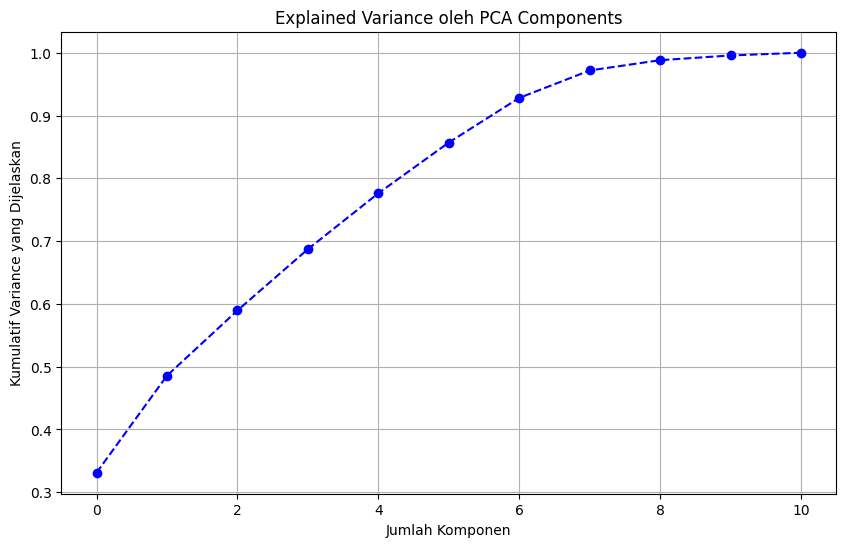

In [68]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [69]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3311 variance terjelaskan
Komponen ke-2: 0.4856 variance terjelaskan
Komponen ke-3: 0.5895 variance terjelaskan
Komponen ke-4: 0.6871 variance terjelaskan
Komponen ke-5: 0.7761 variance terjelaskan
Komponen ke-6: 0.8569 variance terjelaskan
Komponen ke-7: 0.9280 variance terjelaskan
Komponen ke-8: 0.9717 variance terjelaskan
Komponen ke-9: 0.9881 variance terjelaskan
Komponen ke-10: 0.9956 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [70]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 7)
Shape test PCA: (8238, 7)


## Training Data

In [71]:
X_train

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,PM1,EDA,BVP
12977,0.517128,0.284415,0.246611,0.872229,0.646159,0.345026,0.898817,0.611319,0.791895,0.201958,0.428074
36584,0.000000,0.357652,0.821985,0.175064,0.959080,0.430619,0.895364,0.298246,0.386150,0.008619,0.868089
31525,0.243961,0.635042,0.419748,0.063829,0.327104,0.072655,0.258582,0.072655,0.000000,0.210157,0.503498
18438,0.319215,0.717958,0.208520,0.736786,0.664228,0.075351,0.937006,0.074013,0.072675,0.675412,0.514364
3484,0.000000,0.481332,0.370370,0.517397,0.299558,0.239023,0.768162,0.314064,0.351411,0.393351,0.467247
...,...,...,...,...,...,...,...,...,...,...,...
6494,0.113168,0.784079,0.793854,0.802013,0.783663,0.442895,0.990080,0.619560,0.625204,0.290364,0.519821
11686,0.000000,0.610305,0.255343,0.239129,0.662175,0.322216,0.897887,0.556767,0.715843,0.569527,0.568792
39345,0.487289,0.196632,0.048863,0.368528,0.043536,0.152866,0.237665,0.270849,0.281952,0.102710,0.428210
871,0.000000,0.840330,0.673244,0.641620,0.571058,0.051921,0.513374,0.051921,0.034614,0.000000,0.000000


In [72]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_ann(X_train, X_test, y_train, y_test, percobaan="ANN_Full", output_file="results_ann.csv", epochs=30, batch_size=32):
    input_dim = X_train.shape[1]  # jumlah fitur

    # Normalisasi label supaya mulai dari 0
    unique_labels = np.unique(np.concatenate([y_train, y_test]))
    label_mapping = {old: new for new, old in enumerate(unique_labels)}
    y_train = np.array([label_mapping[y] for y in y_train])
    y_test = np.array([label_mapping[y] for y in y_test])

    n_classes = len(unique_labels)  # jumlah kelas sebenarnya
    
    # Definisi model ANN
    model = Sequential([
        Dense(128, activation="relu", input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation="relu"),
        Dropout(0.3),
        Dense(n_classes, activation="softmax")  # output sesuai jumlah kelas
    ])
    
    # Kompilasi model
    model.compile(optimizer="adam", 
                  loss="sparse_categorical_crossentropy", 
                  metrics=["accuracy"])
    
    # Training
    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        epochs=epochs, 
                        batch_size=batch_size,
                        verbose=1)
    
    # Evaluasi
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    report = classification_report(y_test, y_pred_classes, output_dict=True)
    
    # Simpan hasil ke dataframe
    df_results = pd.DataFrame([{
        "Percobaan": percobaan,
        "Model": "ANN",
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }])
    
    print("\n📊 Hasil Evaluasi ANN:")
    print(df_results)
    
    # Simpan ke CSV (append kalau sudah ada)
    try:
        existing = pd.read_csv(output_file)
        df_results = pd.concat([existing, df_results], ignore_index=True)
    except FileNotFoundError:
        pass
    df_results.to_csv(output_file, index=False)
    
    # Plot loss & akurasi
    plt.figure(figsize=(12,5))
    
    # Akurasi
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label="Train Acc")
    plt.plot(history.history["val_accuracy"], label="Val Acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.show()
    
    return df_results, model


Epoch 1/50
2060/2060 [==============================] - 2s 786us/step - loss: 1.2632 - accuracy: 0.4958 - val_loss: 1.1010 - val_accuracy: 0.5647
Epoch 2/50
2060/2060 [==============================] - 2s 772us/step - loss: 1.0907 - accuracy: 0.5751 - val_loss: 0.9756 - val_accuracy: 0.6311
Epoch 3/50
2060/2060 [==============================] - 2s 762us/step - loss: 1.0105 - accuracy: 0.6137 - val_loss: 0.8942 - val_accuracy: 0.6648
Epoch 4/50
2060/2060 [==============================] - 2s 757us/step - loss: 0.9556 - accuracy: 0.6339 - val_loss: 0.8482 - val_accuracy: 0.6707
Epoch 5/50
2060/2060 [==============================] - 2s 776us/step - loss: 0.9117 - accuracy: 0.6505 - val_loss: 0.8084 - val_accuracy: 0.6903
Epoch 6/50
2060/2060 [==============================] - 2s 751us/step - loss: 0.8869 - accuracy: 0.6613 - val_loss: 0.7721 - val_accuracy: 0.7088
Epoch 7/50
2060/2060 [==============================] - 2s 773us/step - loss: 0.8577 - accuracy: 0.6728 - val_loss: 0.7533 -

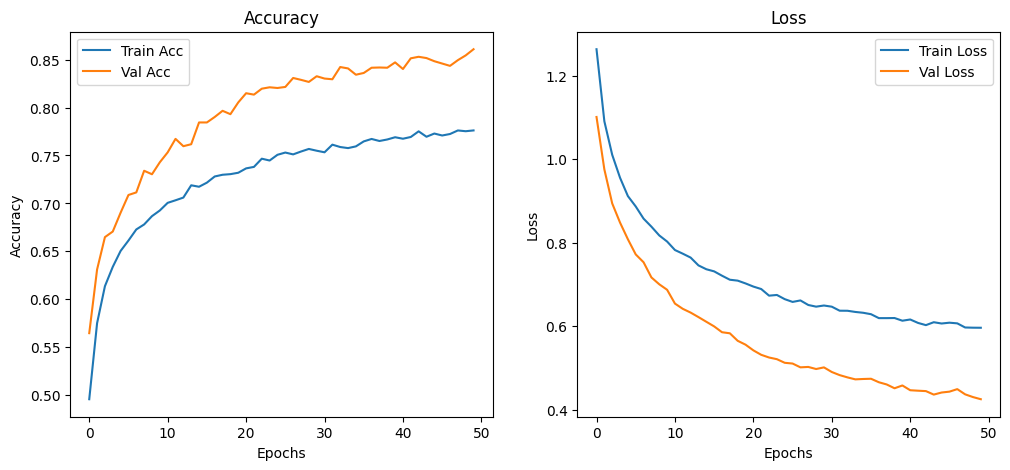

In [73]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train, X_test, y_train, y_test,
    percobaan="ANN Percobaan baseline imbalance",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


Epoch 1/50
2060/2060 [==============================] - 2s 864us/step - loss: 1.1599 - accuracy: 0.5509 - val_loss: 0.9453 - val_accuracy: 0.6366
Epoch 2/50
2060/2060 [==============================] - 2s 840us/step - loss: 0.9851 - accuracy: 0.6270 - val_loss: 0.8375 - val_accuracy: 0.6837
Epoch 3/50
2060/2060 [==============================] - 2s 825us/step - loss: 0.9138 - accuracy: 0.6522 - val_loss: 0.7655 - val_accuracy: 0.7132
Epoch 4/50
2060/2060 [==============================] - 2s 779us/step - loss: 0.8624 - accuracy: 0.6705 - val_loss: 0.7179 - val_accuracy: 0.7305
Epoch 5/50
2060/2060 [==============================] - 2s 769us/step - loss: 0.8280 - accuracy: 0.6842 - val_loss: 0.6774 - val_accuracy: 0.7446
Epoch 6/50
2060/2060 [==============================] - 2s 794us/step - loss: 0.7941 - accuracy: 0.6962 - val_loss: 0.6450 - val_accuracy: 0.7639
Epoch 7/50
2060/2060 [==============================] - 2s 762us/step - loss: 0.7718 - accuracy: 0.7056 - val_loss: 0.6155 -

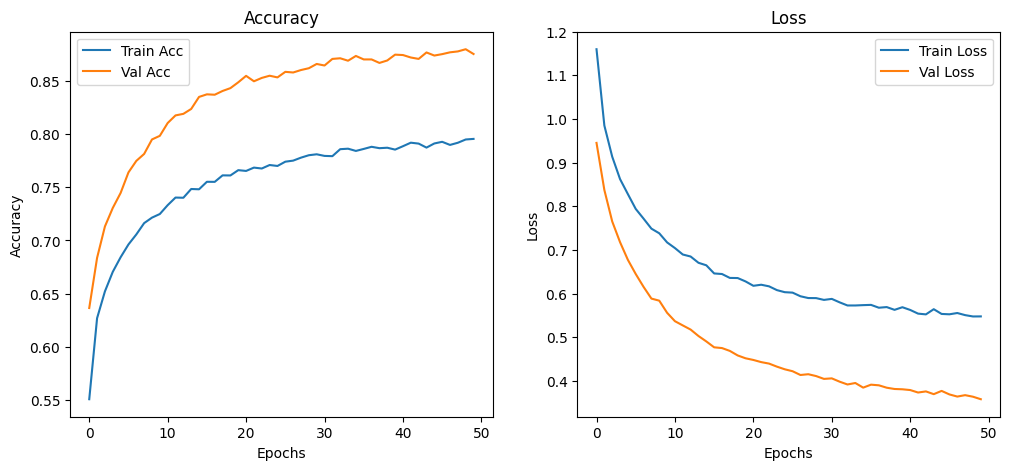

In [74]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_scaled, X_test_scaled, y_train, y_test,
    percobaan="ANN Percobaan normalisasi imbalance",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


In [75]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 7)
Shape test PCA: (8238, 7)


Epoch 1/50
2060/2060 [==============================] - 2s 751us/step - loss: 1.1962 - accuracy: 0.5344 - val_loss: 1.0316 - val_accuracy: 0.6112
Epoch 2/50
2060/2060 [==============================] - 1s 713us/step - loss: 1.0511 - accuracy: 0.6030 - val_loss: 0.9293 - val_accuracy: 0.6458
Epoch 3/50
2060/2060 [==============================] - 2s 732us/step - loss: 0.9922 - accuracy: 0.6258 - val_loss: 0.8697 - val_accuracy: 0.6707
Epoch 4/50
2060/2060 [==============================] - 1s 710us/step - loss: 0.9489 - accuracy: 0.6410 - val_loss: 0.8276 - val_accuracy: 0.6809
Epoch 5/50
2060/2060 [==============================] - 1s 713us/step - loss: 0.9159 - accuracy: 0.6526 - val_loss: 0.7977 - val_accuracy: 0.6903
Epoch 6/50
2060/2060 [==============================] - 1s 727us/step - loss: 0.8935 - accuracy: 0.6620 - val_loss: 0.7761 - val_accuracy: 0.7025
Epoch 7/50
2060/2060 [==============================] - 1s 728us/step - loss: 0.8691 - accuracy: 0.6680 - val_loss: 0.7450 -

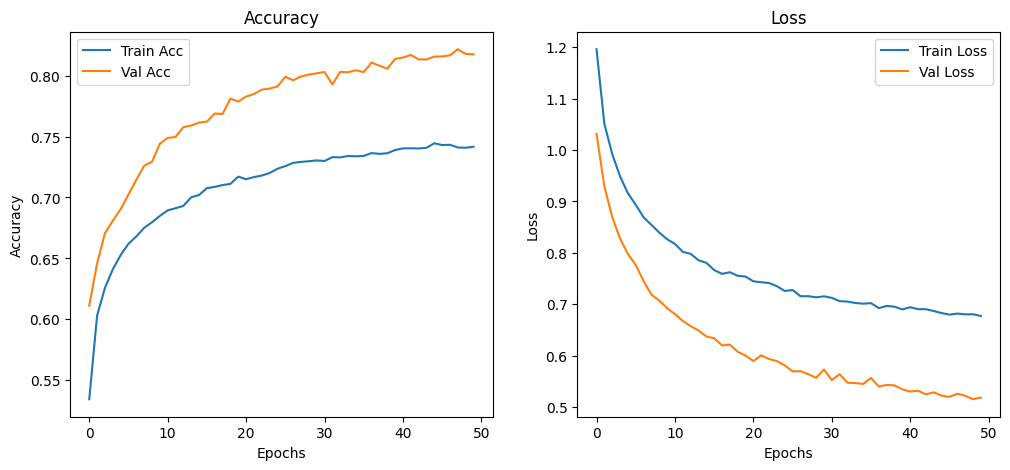

In [76]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="ANN Percobaan pca 7 imbalance",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


In [77]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 6)
Shape test PCA: (8238, 6)


Epoch 1/50
2060/2060 [==============================] - 2s 773us/step - loss: 1.2213 - accuracy: 0.5211 - val_loss: 1.0649 - val_accuracy: 0.5983
Epoch 2/50
2060/2060 [==============================] - 2s 742us/step - loss: 1.0950 - accuracy: 0.5779 - val_loss: 0.9836 - val_accuracy: 0.6272
Epoch 3/50
2060/2060 [==============================] - 2s 765us/step - loss: 1.0417 - accuracy: 0.6041 - val_loss: 0.9286 - val_accuracy: 0.6423
Epoch 4/50
2060/2060 [==============================] - 1s 721us/step - loss: 1.0016 - accuracy: 0.6130 - val_loss: 0.8966 - val_accuracy: 0.6604
Epoch 5/50
2060/2060 [==============================] - 2s 734us/step - loss: 0.9707 - accuracy: 0.6247 - val_loss: 0.8681 - val_accuracy: 0.6624
Epoch 6/50
2060/2060 [==============================] - 1s 714us/step - loss: 0.9496 - accuracy: 0.6316 - val_loss: 0.8360 - val_accuracy: 0.6799
Epoch 7/50
2060/2060 [==============================] - 1s 721us/step - loss: 0.9271 - accuracy: 0.6370 - val_loss: 0.8076 -

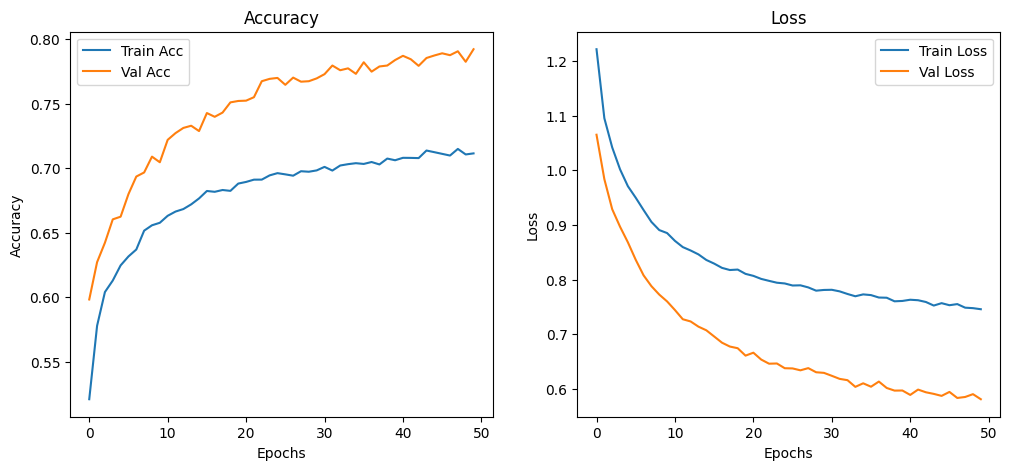

In [78]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="ANN Percobaan pca 6 imbalance",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)


In [79]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 5)
Shape test PCA: (8238, 5)


Epoch 1/50
2060/2060 [==============================] - 2s 796us/step - loss: 1.2630 - accuracy: 0.4943 - val_loss: 1.1335 - val_accuracy: 0.5672
Epoch 2/50
2060/2060 [==============================] - 2s 733us/step - loss: 1.1589 - accuracy: 0.5501 - val_loss: 1.0733 - val_accuracy: 0.6020
Epoch 3/50
2060/2060 [==============================] - 2s 801us/step - loss: 1.1153 - accuracy: 0.5708 - val_loss: 1.0216 - val_accuracy: 0.6035
Epoch 4/50
2060/2060 [==============================] - 2s 812us/step - loss: 1.0804 - accuracy: 0.5810 - val_loss: 0.9838 - val_accuracy: 0.6236
Epoch 5/50
2060/2060 [==============================] - 2s 813us/step - loss: 1.0550 - accuracy: 0.5906 - val_loss: 0.9575 - val_accuracy: 0.6305
Epoch 6/50
2060/2060 [==============================] - 2s 828us/step - loss: 1.0336 - accuracy: 0.5990 - val_loss: 0.9329 - val_accuracy: 0.6374
Epoch 7/50
2060/2060 [==============================] - 2s 784us/step - loss: 1.0157 - accuracy: 0.6055 - val_loss: 0.9172 -

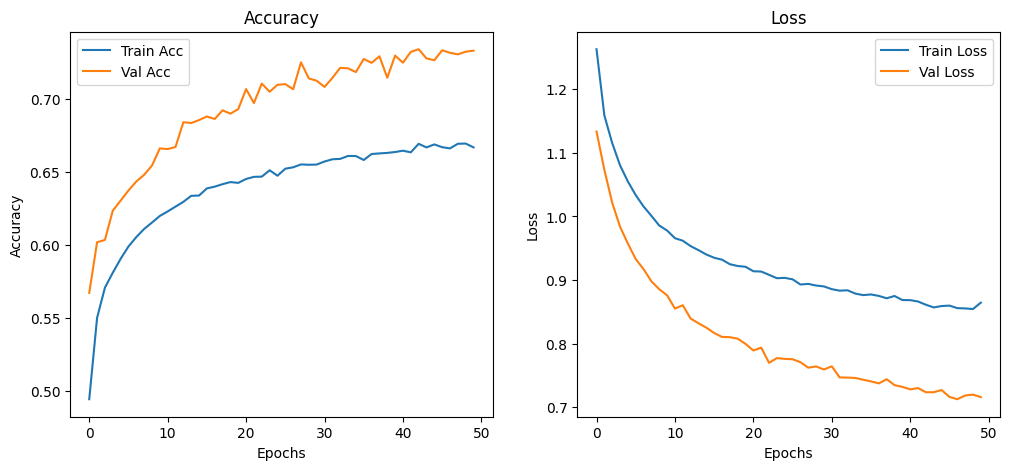

In [80]:
# Panggil fungsi evaluasi ANN
df_results, model = evaluate_ann(
    X_train_pca, X_test_pca, y_train, y_test,
    percobaan="ANN Percobaan pca 5 imbalance",  # bebas isi nama percobaan
    output_file="results_ann.csv", # file penyimpanan
    epochs=50,    # jumlah epoch
    batch_size=16 # ukuran batch
)
